In [336]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import tensorflow
from IPython.display import display
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

%matplotlib inline

tensorflow.__version__

'2.18.0'

In [258]:
iris_dataset=load_iris()
print(iris_dataset)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [259]:
print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [260]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [261]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


In [262]:
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [263]:
X_train,X_test,y_train,y_test = train_test_split(
    iris_dataset['data'],iris_dataset['target'],random_state=0
)

print(X_train,X_test,y_train,y_test)

[[5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]
 [5.6 2.5 3.9 1.1]
 [7.7 3.  6.1 2.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.8 1.1]
 [6.3 2.7 4.9 1.8]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [7.  3.2 4.7 1.4]
 [6.5 3.  5.2 2. ]
 [6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.4 0.1]
 [7.1 3.  5.9 2.1]
 [6.9 3.2 5.7 2.3]
 [6.5 3.  5.8 2.2]
 [6.4 2.8 5.6 2.1]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [6.5 3.2 5.1 2. ]
 [6.7 3.3 5.

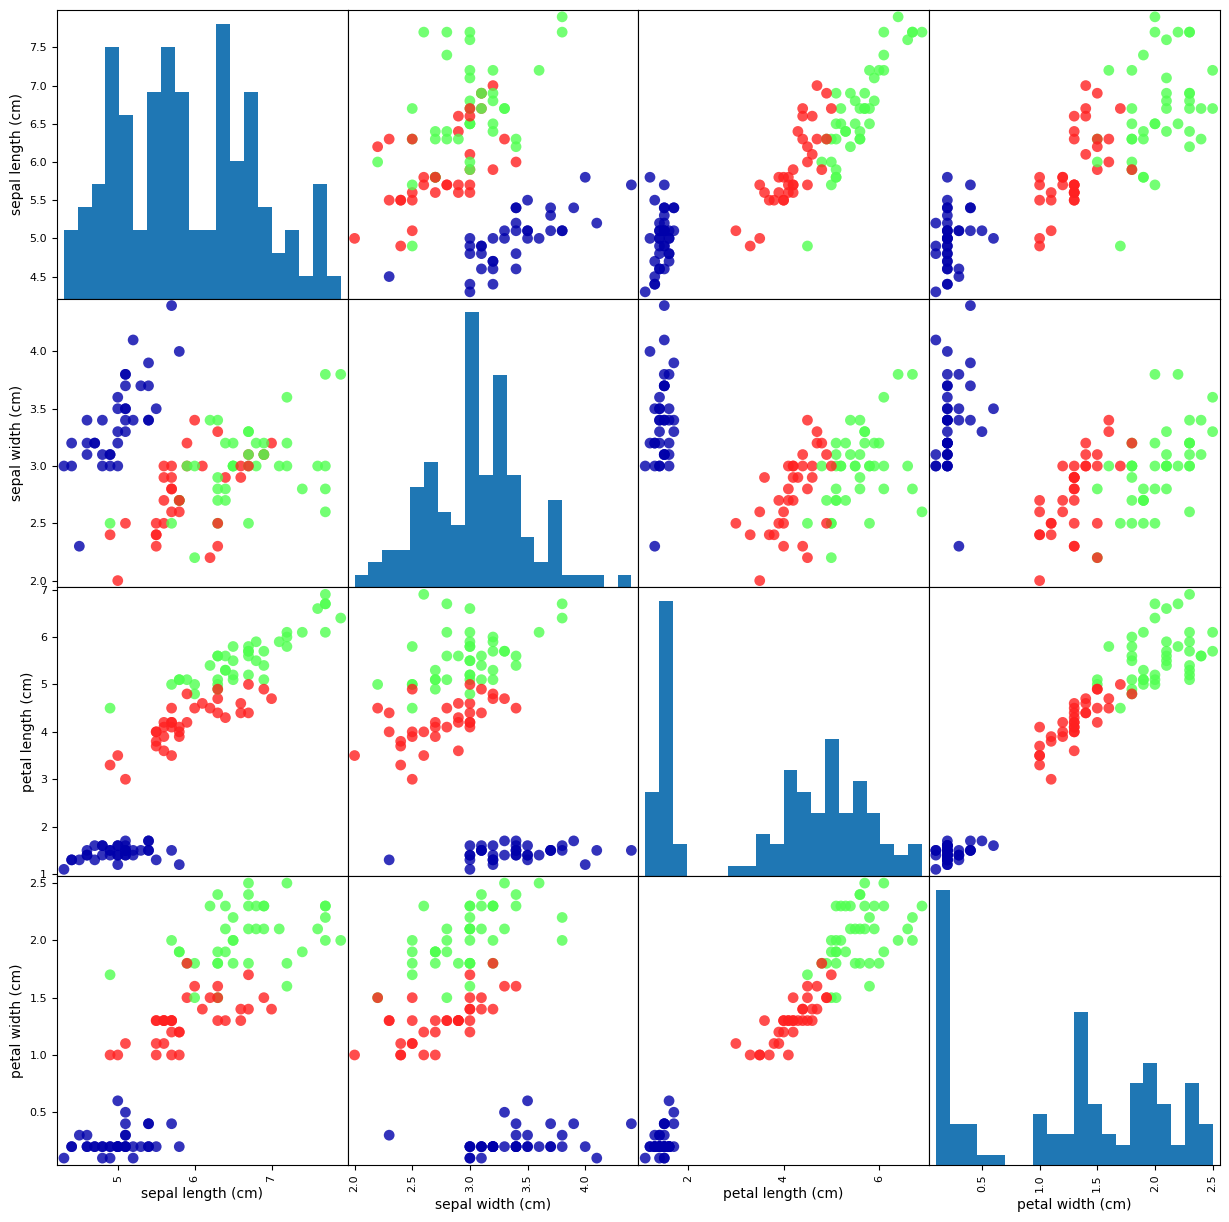

In [264]:
iris_dataframe=pd.DataFrame(X_train,columns=iris_dataset.feature_names)
grr=scatter_matrix(iris_dataframe,c=y_train,figsize=(15,15),marker="o",
                     hist_kwds={'bins':20},s=60,alpha=.8,cmap=mglearn.cm3)

In [265]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
print(knn)

KNeighborsClassifier(n_neighbors=1)


In [266]:
knn.fit(X_train,y_train)
print(knn)

KNeighborsClassifier(n_neighbors=1)


In [267]:
X_new=np.array([[5,2.9,1,0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [268]:
prediction=knn.predict(X_new)
print(prediction)
print(iris_dataset["target_names"][prediction])

[0]
['setosa']


In [269]:
y_pred=knn.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [270]:
print(np.mean(y_pred==y_test))

0.9736842105263158


In [271]:
print(knn.score(X_test,y_test))

0.9736842105263158


In [272]:
X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

print(knn.score(X_test,y_test))

0.9736842105263158


# ２章　

(26, 2)


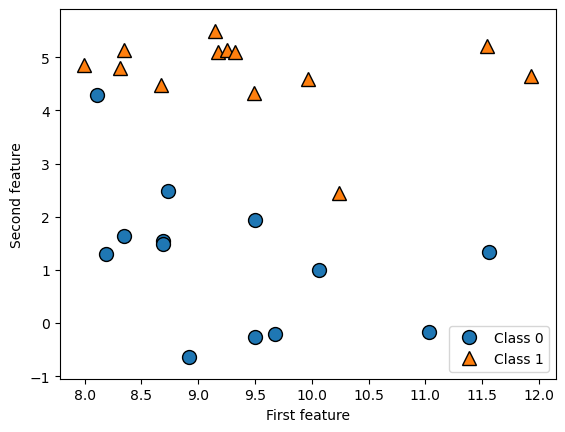

In [273]:
X,y=mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0","Class 1"],loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print(X.shape)

[-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.13455014  0.69798591  0.43655826 -0.95652133
  0.03527881 -2.08581717 -0.47411033  1.53708251  0.86893293  1.87664889
  0.0945257  -1.41502356  0.25438895  0.09398858]


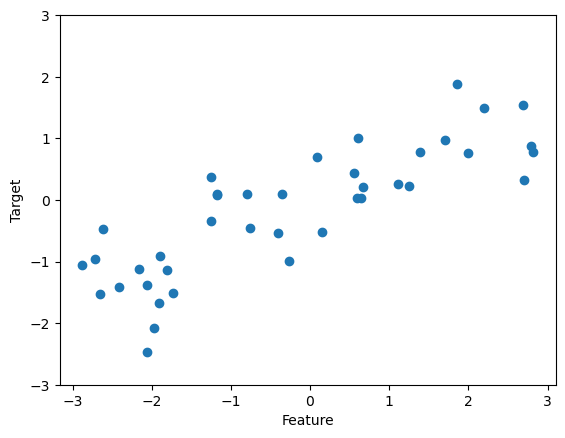

In [274]:
X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,"o")
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")
print(y)

In [275]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print(cancer.keys())
print(cancer.data.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(569, 30)


In [276]:
for n, v in zip(cancer.target_names, np.bincount(cancer.target)):
    print(f"{n}: {v}")

malignant: 212
benign: 357


In [277]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


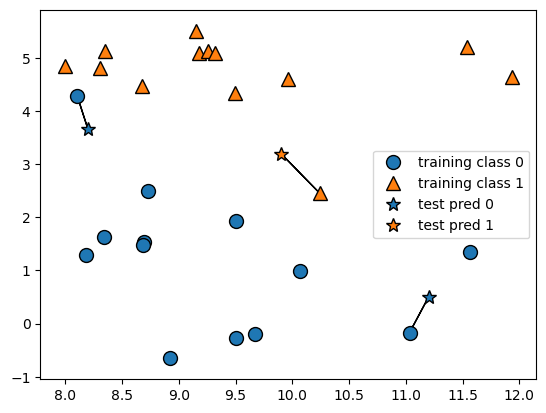

In [278]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

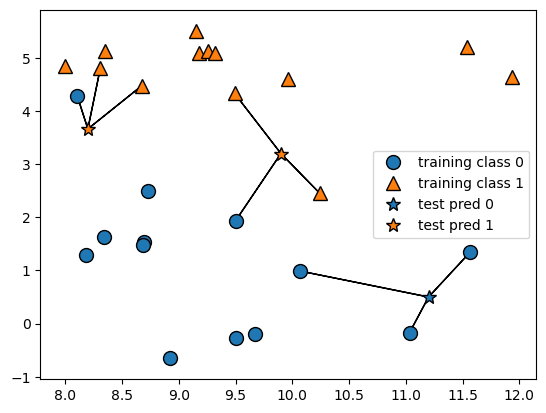

In [279]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [280]:
from sklearn.model_selection import train_test_split

X,y=mglearn.datasets.make_forge()

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(19, 2) (19,) (7, 2) (7,)


In [281]:
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=3)

In [282]:
clf.fit(X_train,y_train)

print(clf.predict(X_test))

[1 0 1 0 1 0 0]


In [283]:
for pred,actual in zip(clf.predict(X_test),y_test):
    print(pred,actual)

1 1
0 0
1 1
0 0
1 1
0 1
0 0


In [284]:
print(clf.score(X_test,y_test))

0.8571428571428571


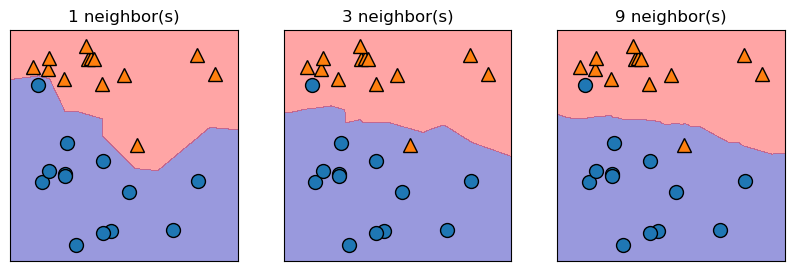

In [285]:
fig,axes=plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax,in zip([1,3,9],axes):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    

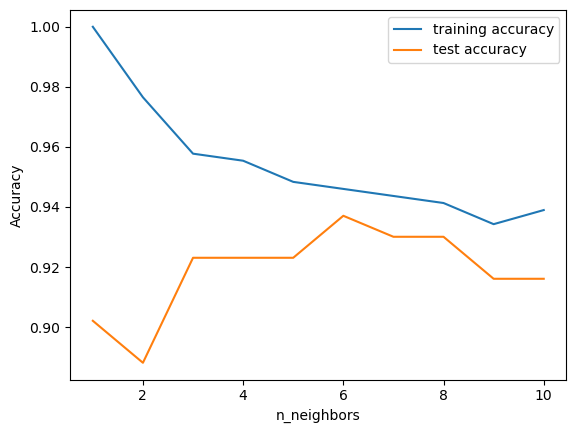

In [286]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,cancer.target,stratify=cancer.target,random_state=66
)
training_accuracy=[]
test_accuracy=[]
neighbors_setting=range(1,11)

for n_neighbors in neighbors_setting:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))


plt.plot(neighbors_setting,training_accuracy,label="training accuracy")
plt.plot(neighbors_setting,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


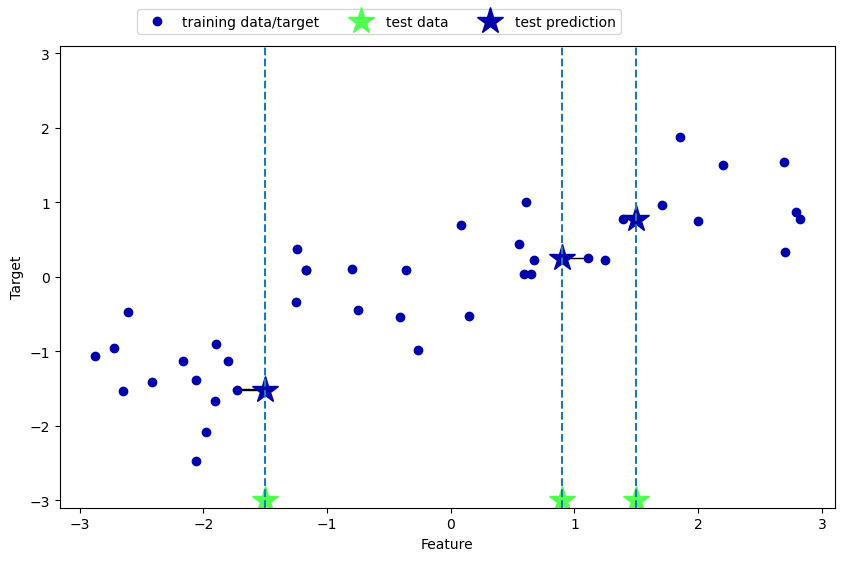

In [287]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

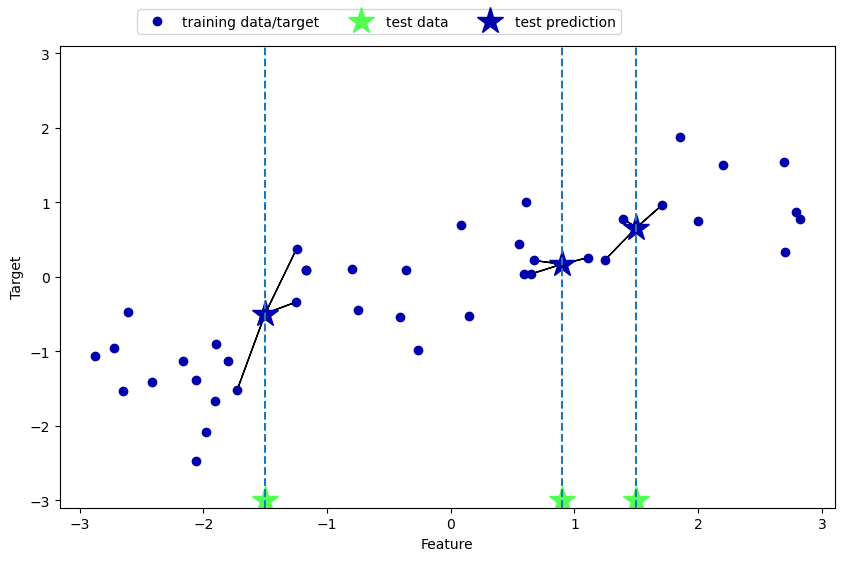

In [288]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [289]:
from sklearn.neighbors import KNeighborsRegressor

X,y=mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

for pred,actual in zip(reg.predict(X_test),y_test):
    print(pred,actual)

print(reg.score(X_test,y_test))
print(reg.score(X_train,y_train))

-0.05396538712649832 0.37299128558203876
0.35686046411195704 0.21778192997679752
1.1367192298471605 0.9669542784994007
-1.8941568209640478 -1.387736322783352
-1.1388139797014292 -1.0597955495135434
-1.6311338205526333 -0.9049698817209018
0.35686046411195704 0.4365582572340341
0.9124137361448525 0.7789637997364854
-0.4468044564355589 -0.5411459892580738
-1.1388139797014292 -0.956521325889873
0.8344172446249605
0.8194343929538755


(30, 1)
(30, 1)
(30, 1)


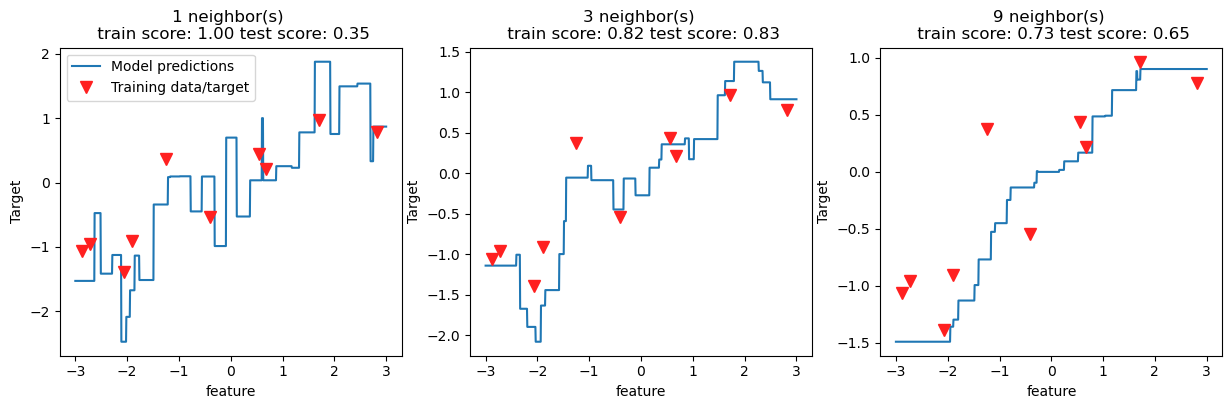

In [290]:
fig,axes=plt.subplots(1,3,figsize=(15,4))
line=np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbors,ax in zip([1,3,9],axes):
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    #ax.plot(X_train,y_train,"^",color=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,"v",color=mglearn.cm2(1),markersize=8)
    print(X_train.shape)

    ax.set_title(
        "{} neighbor(s) \n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)
        )
    )
    ax.set_xlabel("feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions","Training data/target","Test data/target"],loc="best")

w[0]: 0.393906  b: -0.031804


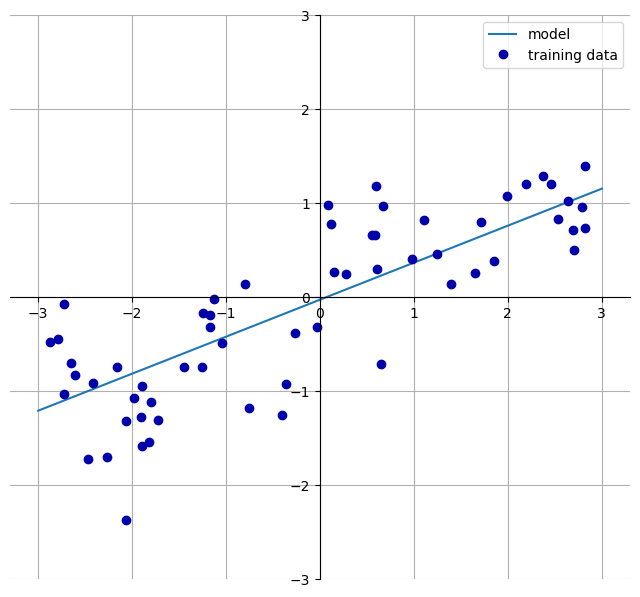

In [291]:
mglearn.plots.plot_linear_regression_wave()

[0.39390555]
-0.031804343026759746


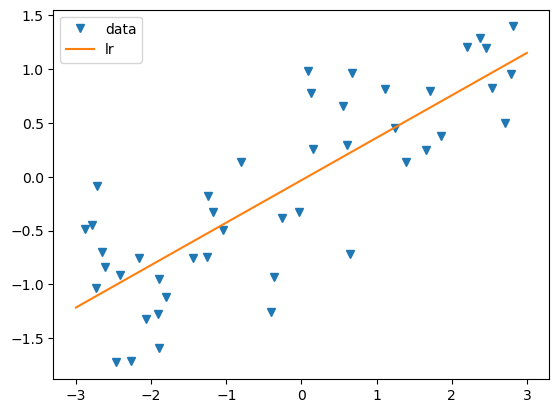

In [292]:
from sklearn.linear_model import LinearRegression
X,y=mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

lr=LinearRegression().fit(X_train,y_train)

print(lr.coef_)
print(lr.intercept_)

line=np.linspace(-3,3,1000).reshape(-1,1)

z=lr.coef_*line+lr.intercept_

plt.plot(X_train,y_train,"v",label="data")
plt.plot(line,z,label="lr")
plt.legend()

In [293]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.6700890315075756
0.65933685968637


In [294]:
from sklearn.linear_model import Ridge

ridge=Ridge().fit(X_train,y_train)
print(ridge.score(X_test,y_test))

0.6577946863634279


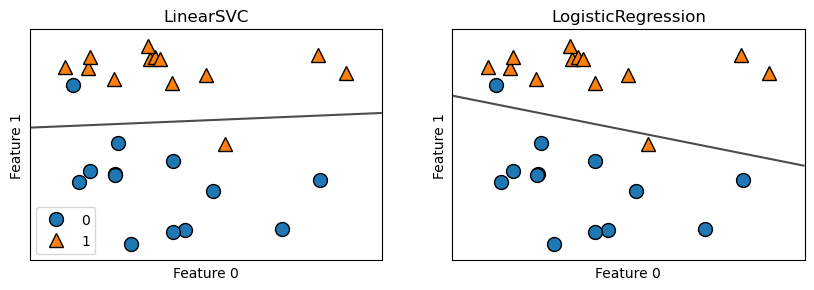

In [295]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y=mglearn.datasets.make_forge()

fig,axes=plt.subplots(1,2,figsize=(10,3))

for model,ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,
                                    ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

axes[0].legend()

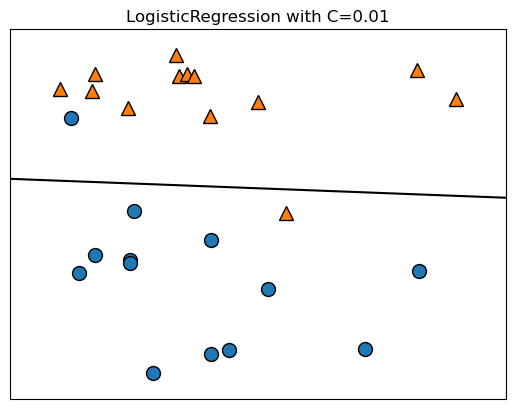

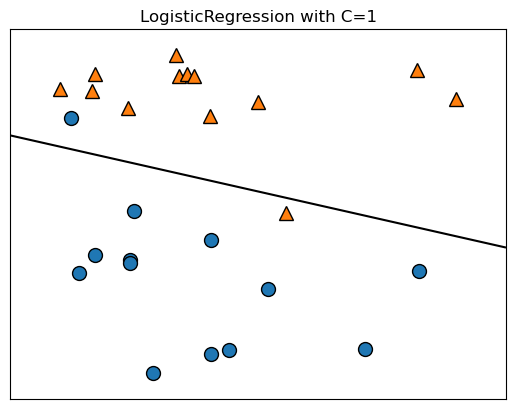

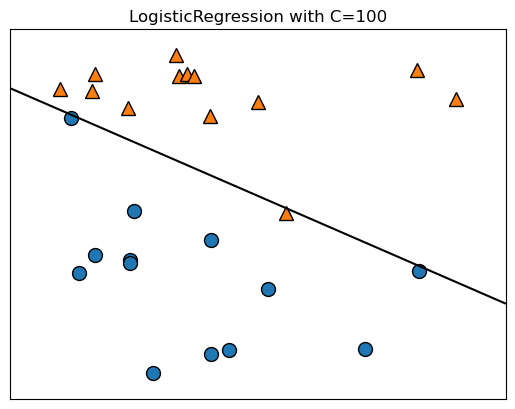

In [296]:
for C in [0.01, 1, 100]:
    model = LogisticRegression(C=C)
    model.fit(X, y)
    mglearn.plots.plot_2d_separator(model, X, fill=False, eps=0.5)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
    plt.title(f"LogisticRegression with C={C}")
    plt.show()

In [297]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,cancer.target,stratify=cancer.target,random_state=42
)

logreg=LogisticRegression().fit(X_train,y_train)
print("train data")
print(logreg.score(X_train,y_train))
print("test data")
print(logreg.score(X_test,y_test))

train data
0.9530516431924883
test data
0.958041958041958


C:\Users\sukedd23\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [298]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.958


C:\Users\sukedd23\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [299]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


C:\Users\sukedd23\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [300]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.958


C:\Users\sukedd23\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


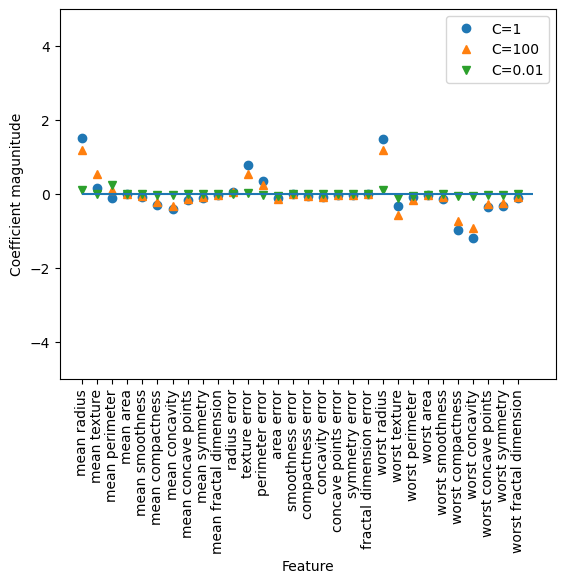

In [301]:
plt.plot(logreg.coef_.T,"o",label="C=1")
plt.plot(logreg100.coef_.T,"^",label="C=100")
plt.plot(logreg001.coef_.T,"v",label=("C=0.01"))
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magunitude")
plt.legend()

Training Accuracy of l1 logleg with C=0.001:0.91
Test Accuracy
0.001 0.9230769230769231
Training Accuracy of l1 logleg with C=1.000:0.96
Test Accuracy
1 0.958041958041958
Training Accuracy of l1 logleg with C=100.000:0.99
Test Accuracy
100 0.9790209790209791


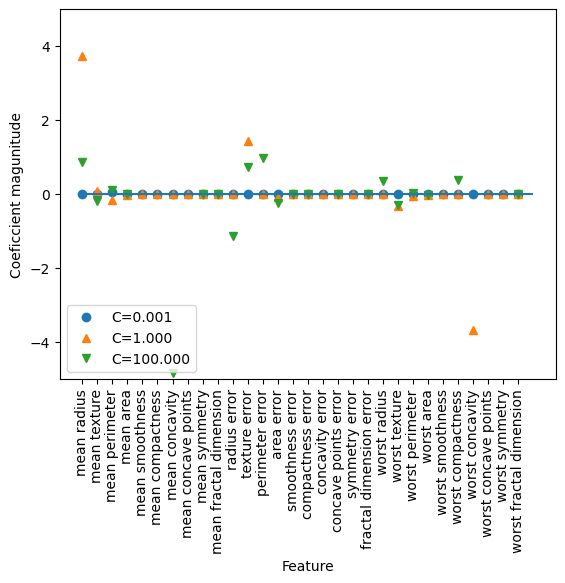

In [302]:
for C,marker in zip([0.001,1,100],["o","^","v"]):
    lr_l1=LogisticRegression(C=C,penalty="l1",solver="liblinear").fit(X_train,y_train)
    print("Training Accuracy of l1 logleg with C={:.3f}:{:.2f}".format(
        C,lr_l1.score(X_train,y_train)
    ))
    print("Test Accuracy")
    print(C,lr_l1.score(X_test,y_test))
    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coeficcient magunitude")

plt.ylim(-5,5)
plt.legend(loc=3)

[[-7.72642091 -8.39495682]
 [ 5.45339605  0.74230537]
 [-2.97867201  9.55684617]
 [ 6.04267315  0.57131862]
 [-6.52183983 -6.31932507]
 [ 3.64934251  1.40687195]
 [-2.17793419  9.98983126]
 [ 4.42020695  2.33028226]
 [ 4.73695639  2.94181467]
 [-3.6601912   9.38998415]
 [-3.05358035  9.12520872]
 [-6.65216726 -5.57296684]
 [-6.35768563 -6.58312492]
 [-3.6155326   7.8180795 ]
 [-1.77073104  9.18565441]
 [-7.95051969 -6.39763718]
 [-6.60293639 -6.05292634]
 [-2.58120774 10.01781903]
 [-7.76348463 -6.72638449]
 [-6.40638957 -6.95293851]
 [-2.97261532  8.54855637]
 [-6.9567289  -6.53895762]
 [-7.32614214 -6.0237108 ]
 [-2.14780202 10.55232269]
 [-2.54502366 10.57892978]
 [-2.96983639 10.07140835]
 [ 3.22450809  1.55252436]
 [-6.25395984 -7.73726715]
 [-7.85430886 -6.09302499]
 [-8.1165779  -8.20056621]
 [-7.55965191 -6.6478559 ]
 [ 4.93599911  2.23422496]
 [ 4.44751787  2.27471703]
 [-5.72103161 -7.70079191]
 [-0.92998481  9.78172086]
 [-3.10983631  8.72259238]
 [-2.44166942  7.58953794]
 

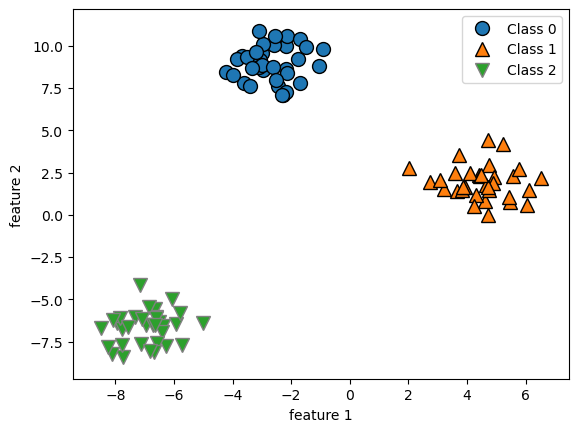

In [303]:
from sklearn.datasets import make_blobs

X,y=make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend(["Class 0","Class 1","Class 2"])

print(X)
print(y)

In [304]:
linear_svm=LinearSVC().fit(X,y)
print("Coefficient shape: ",linear_svm.coef_.shape)
print("Intercept shape: ",linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


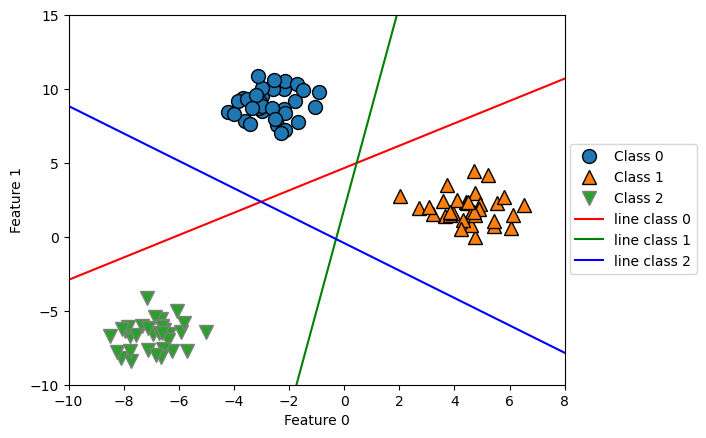

In [305]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,
                               ["r","g","b"]):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
    
    
    
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2","line class 0","line class 1","line class 2"],loc=(1.01,0.3))
plt.show()

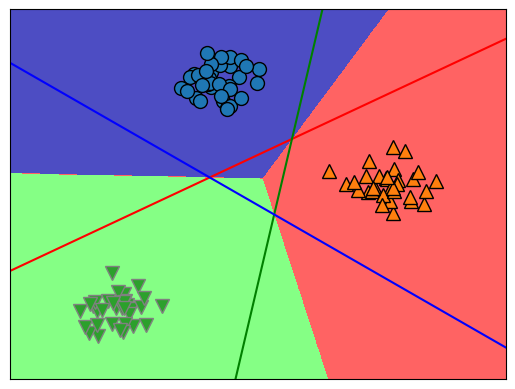

In [306]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)

for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,["r","g","b"]):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)



## ４クラス分類。領域表示が上手くいかず

(100, 2)
(4, 2)


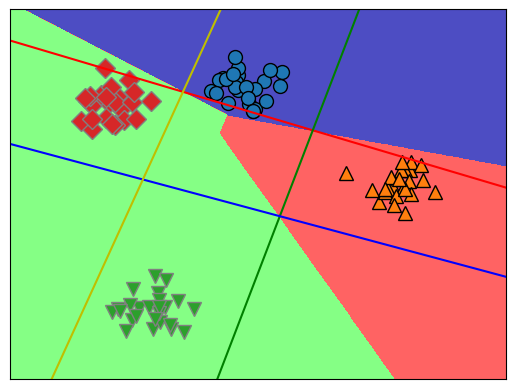

In [307]:
X,y=make_blobs(random_state=42,centers=4)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

linear_svm_4=LinearSVC(C=100).fit(X,y)
print(X.shape)
print(linear_svm_4.coef_.shape)
for coef,intercept,color in zip(linear_svm_4.coef_,linear_svm_4.intercept_,["r","g","b","y"]):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)

mglearn.plots.plot_2d_classification(linear_svm_4,X,fill=True,alpha=.7)



## ナイーブベイズクラス分類期

In [308]:
X=np.array([[0,1,0,1],[1,0,1,1],[0,0,0,1],[1,0,1,0]])
y=np.array([0,1,0,1])

counts={}
for label in np.unique(y):
    counts[label]=X[y==label].sum(axis=0)

print(counts)

{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


## 決定木

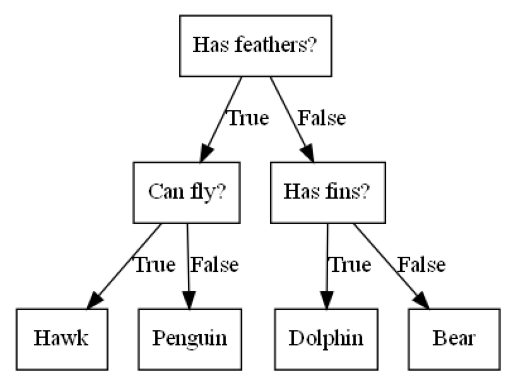

In [309]:
mglearn.plots.plot_animal_tree()

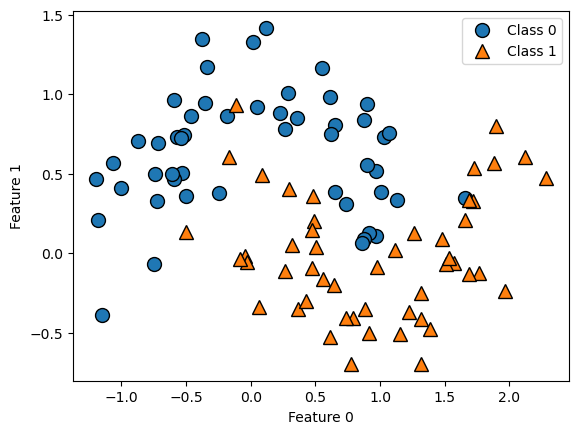

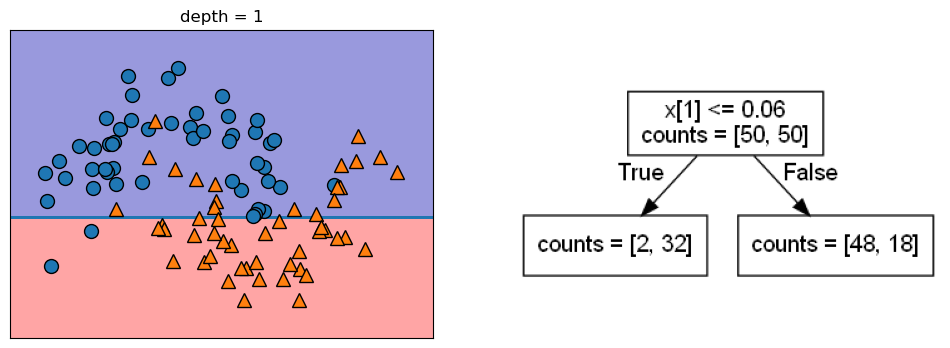

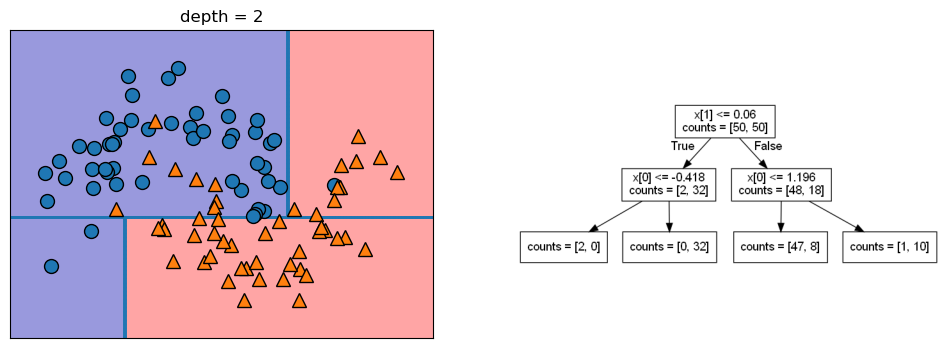

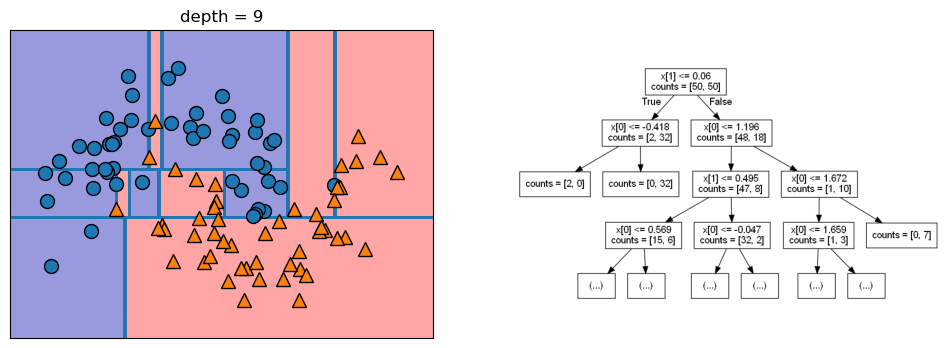

In [310]:
mglearn.plots.plot_tree_progressive()

In [311]:
from sklearn.tree import DecisionTreeClassifier

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,cancer.target,stratify=cancer.target,random_state=42
)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("train tree score")
print(tree.score(X_train,y_train))
print("test tree score")
print(tree.score(X_test,y_test))

train tree score
1.0
test tree score
0.9370629370629371


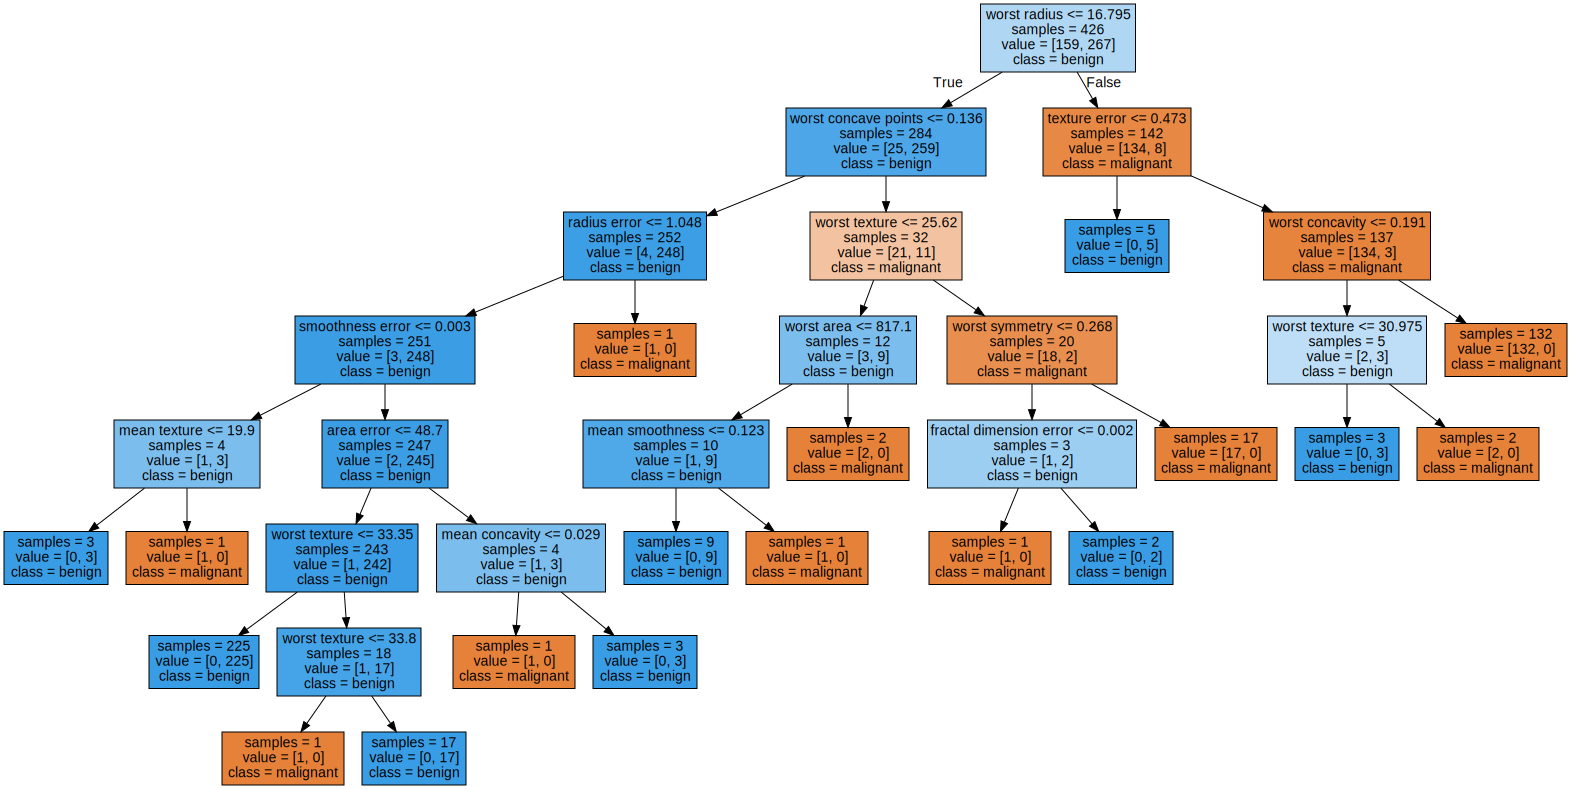

In [312]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot",class_names=["malignant","benign"],feature_names=cancer.feature_names,impurity=False,filled=True)
import graphviz

with open("tree.dot") as f:
    dot_graph=f.read()

graphviz.Source(dot_graph)

In [313]:
tree=DecisionTreeClassifier(random_state=0,max_depth=4)
tree.fit(X_train,y_train)

print("Accuracy train: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy test: {:.3f}".format(tree.score(X_test,y_test)))


Accuracy train: 0.988
Accuracy test: 0.951


In [314]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot",class_names=["malignant","benign"],feature_names=cancer.feature_names,impurity=False,filled=True)


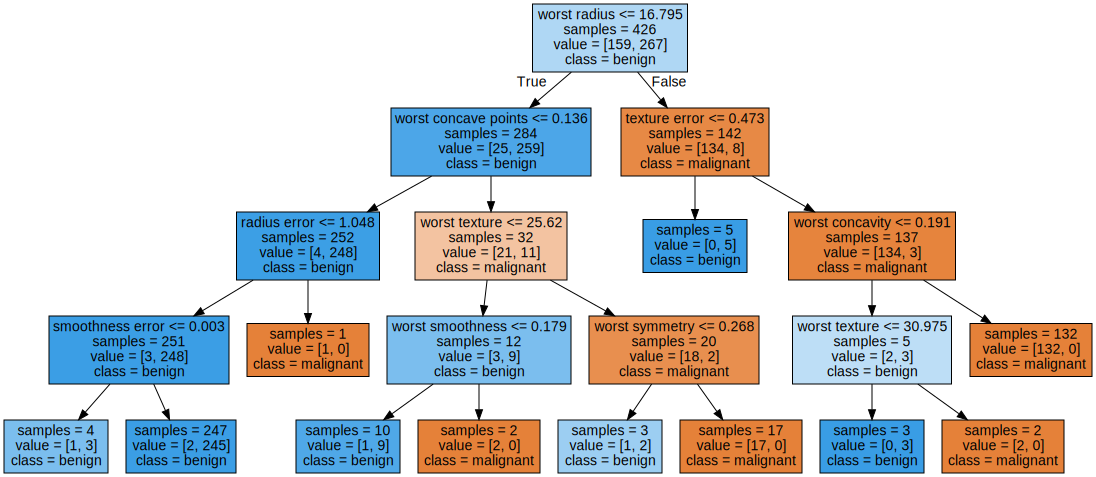

In [315]:
import graphviz

with open("tree.dot") as f:
    dot_graph=f.read()

graphviz.Source(dot_graph)

In [316]:
print("Feature importances: \n{}".format(tree.feature_importances_))
print(tree.feature_importances_.shape)
print(cancer.feature_names.shape)

Feature importances: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]
(30,)
(30,)


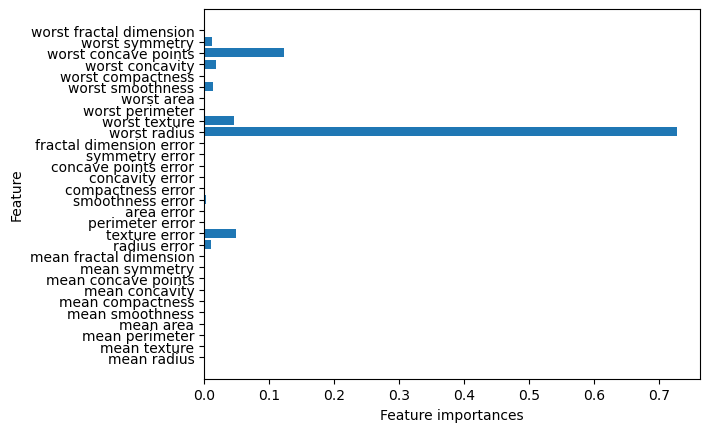

In [317]:
def plot_feature_importances_cancer(model):
    n_features=cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align="center")
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature importances")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


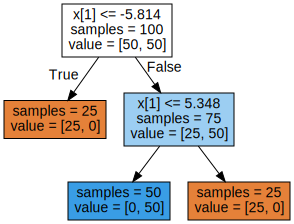

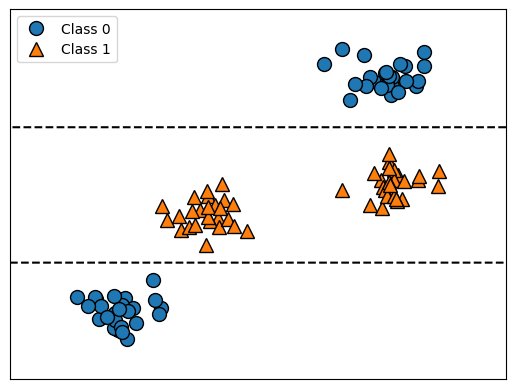

In [318]:
tree=mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

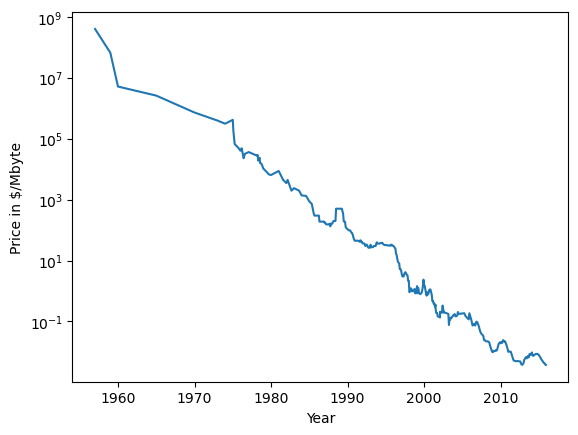

In [319]:
import os
ram_prices=pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,
                      "ram_price.csv"))
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [320]:
from sklearn.tree import DecisionTreeRegressor
data_train=ram_prices[ram_prices.date<2000]
data_test=ram_prices[ram_prices.date>=2000]

X_train=data_train.date.values[:,np.newaxis]
y_train=np.log(data_train.price)

tree=DecisionTreeRegressor().fit(X_train,y_train)
linear_reg=LinearRegression().fit(X_train,y_train)

X_all=ram_prices.date.values[:,np.newaxis]

pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)

price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

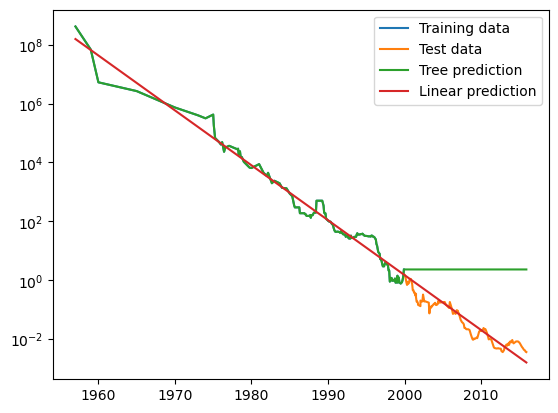

In [321]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

In [322]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

forest=RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

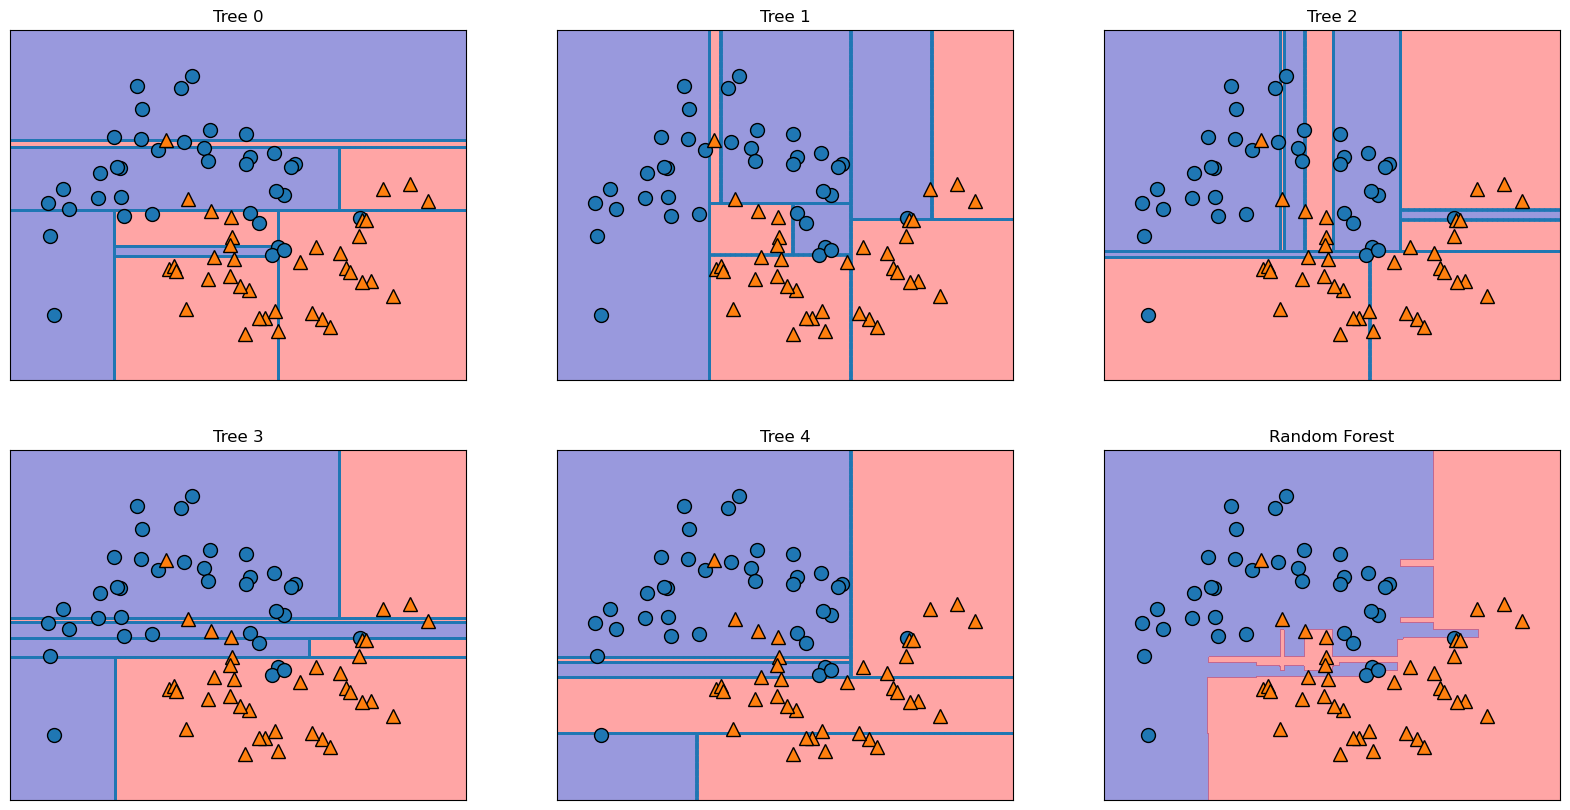

In [323]:
fig,axes=plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest,X_train,fill=True,ax=axes[-1,-1],
                               alpha=.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

In [324]:
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,cancer.target,random_state=0
)
forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print("Accuracy train data :{:.3f}".format(forest.score(X_train,y_train)))
print("Accuracy test data :{:.3f}".format(forest.score(X_test,y_test)))


Accuracy train data :1.000
Accuracy test data :0.972


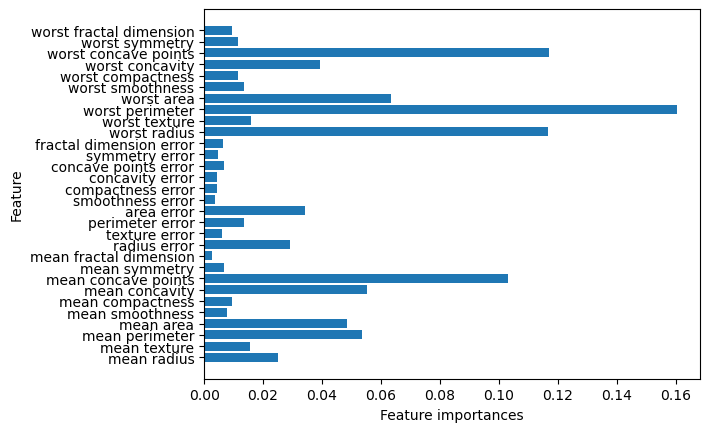

In [325]:
plot_feature_importances_cancer(forest)

In [326]:
from sklearn.ensemble import GradientBoostingClassifier

X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,cancer.target,random_state=0
)
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print("train :{:.3f}".format(gbrt.score(X_train,y_train)))
print("test :{:.3f}".format(gbrt.score(X_test,y_test)))

train :1.000
test :0.965


In [327]:
gbrt=GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

print("train :{:.3f}".format(gbrt.score(X_train,y_train)))
print("test :{:.3f}".format(gbrt.score(X_test,y_test)))

train :0.991
test :0.972


In [328]:
gbrt=GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("train :{:.3f}".format(gbrt.score(X_train,y_train)))
print("test :{:.3f}".format(gbrt.score(X_test,y_test)))

train :0.988
test :0.958


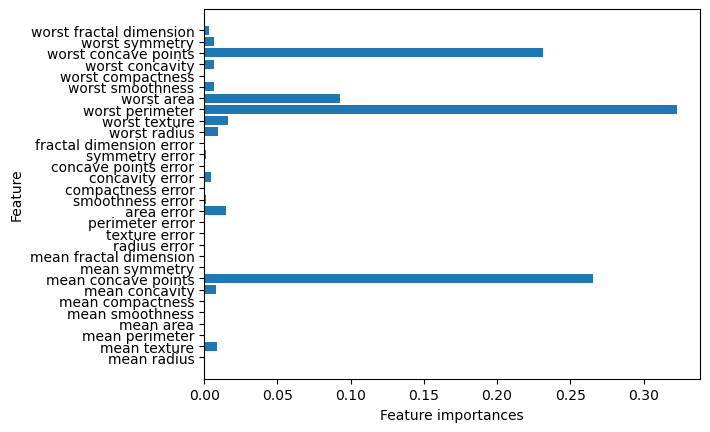

In [329]:
gbrt=GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)

Text(0, 0.5, 'Feature 1')

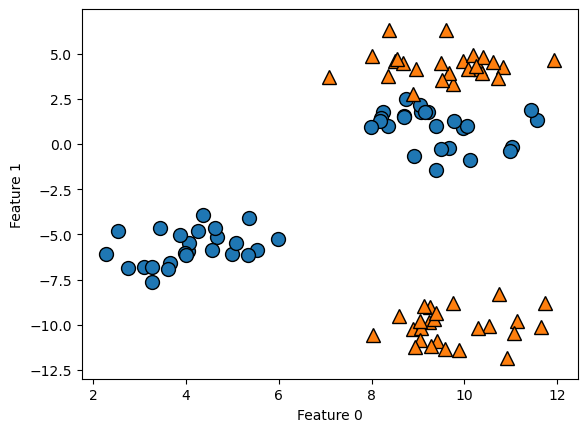

In [330]:
X,y=make_blobs(centers=4,random_state=4)
y=y%2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

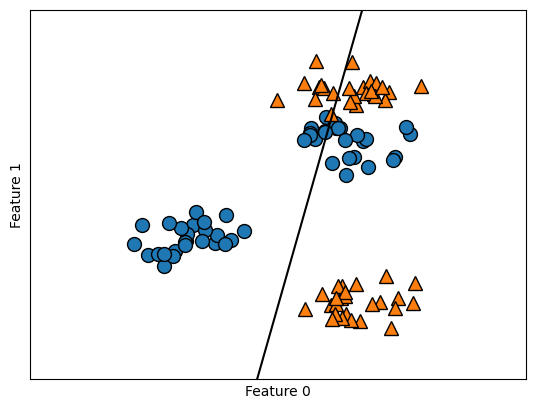

In [331]:
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

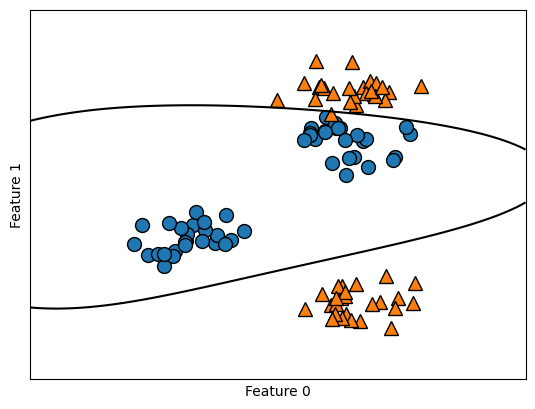

In [332]:
from sklearn.svm import SVC
linear_svm=SVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [353]:
X_new=np.hstack([X,X[:,1:]**2])

print(X_new)

from mpl_toolkits.mplot3d import Axes3D,axes3d
figure=plt.figure()

ax=Axes3D(figure,elev=-152,azim=-26)
mask=y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c="b",
          s=60
          )
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c="r",marker="^",
          s=60
)
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 1**2")
plt.show()

[[ 3.27342806e+00 -7.64422481e+00  5.84341729e+01]
 [ 9.06439343e+00  1.74115688e+00  3.03162729e+00]
 [ 8.50931860e+00  4.57718455e+00  2.09506184e+01]
 [ 4.25747853e+00 -4.82782322e+00  2.33078770e+01]
 [ 8.23501274e+00  1.78248134e+00  3.17723972e+00]
 [ 1.10329545e+01 -1.68167170e-01  2.82801972e-02]
 [ 9.40607765e+00 -1.09202186e+01  1.19251174e+02]
 [ 8.19679821e+00  1.45456477e+00  2.11575866e+00]
 [ 9.95926647e+00  8.56658055e-01  7.33863023e-01]
 [ 1.15639570e+01  1.33894020e+00  1.79276085e+00]
 [ 4.03584026e+00 -5.91873427e+00  3.50314153e+01]
 [ 2.74717603e+00 -6.84650037e+00  4.68745673e+01]
 [ 4.36263466e+00 -3.94581158e+00  1.55694291e+01]
 [ 8.35760513e+00  9.99077722e-01  9.98156295e-01]
 [ 9.96346605e+00  4.59676542e+00  2.11302523e+01]
 [ 1.08336073e+01  4.24176117e+00  1.79925378e+01]
 [ 1.07255058e+01  3.64867534e+00  1.33128317e+01]
 [ 8.67494727e+00  4.47573059e+00  2.00321643e+01]
 [ 9.67284681e+00 -2.02831649e-01  4.11406780e-02]
 [ 8.18378052e+00  1.29564214e+

<Figure size 640x480 with 0 Axes>

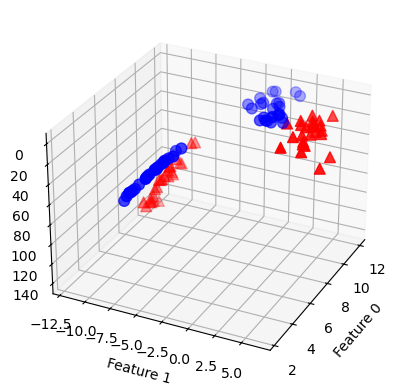

In [334]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', elev=-152, azim=-26)

# プロット内容は同じ
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c="b", s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c="r", marker="^", s=60)

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1^2")

plt.show()


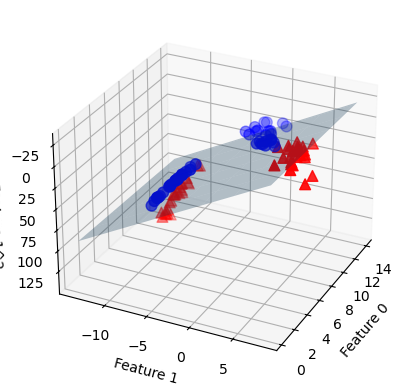

In [344]:
linear_svm_3d=LinearSVC().fit(X_new,y)
coef,intercept=linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_

figure=plt.figure()
ax=figure.add_subplot(111,projection="3d",elev=-152,azim=-26)

xx=np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy=np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)

XX,YY=np.meshgrid(xx,yy)
ZZ=(coef[0]*XX+coef[1]*YY+intercept)/-coef[2]

ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c="b",s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c="r",marker="^",s=60)

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1^2")
plt.show()

(2500,)
[10.20354552 10.19358341 10.1836213  ...  9.28177978  9.27181767
  9.26185556]
[[10.20354552 10.19358341 10.1836213  ...  9.73532629  9.72536418
   9.71540207]
 [ 9.18977047  9.17980836  9.16984625 ...  8.72155124  8.71158913
   8.70162702]
 [ 8.21785039  8.20788828  8.19792617 ...  7.74963116  7.73966905
   7.72970694]
 ...
 [ 7.80132809  7.79136597  7.78140386 ...  7.33310886  7.32314674
   7.31318463]
 [ 8.75473607  8.74477396  8.73481185 ...  8.28651684  8.27655473
   8.26659262]
 [ 9.74999901  9.7400369   9.73007479 ...  9.28177978  9.27181767
   9.26185556]]


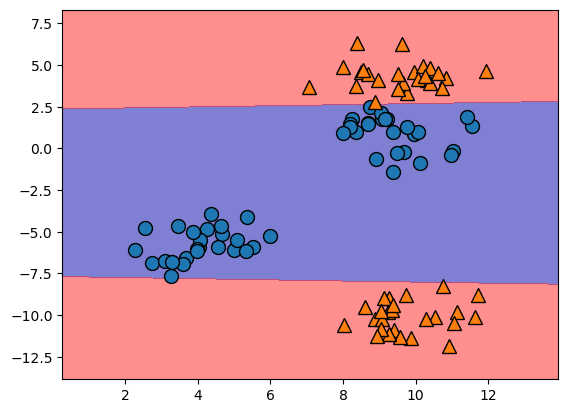

(50, 50)


In [359]:
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
print(dec.shape)
print(dec)
print(dec.reshape(XX.shape))
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],
            cmap=mglearn.cm2,alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
plt.show()
print(XX.shape)

Text(0.5, 0.5, 'Feature 1')

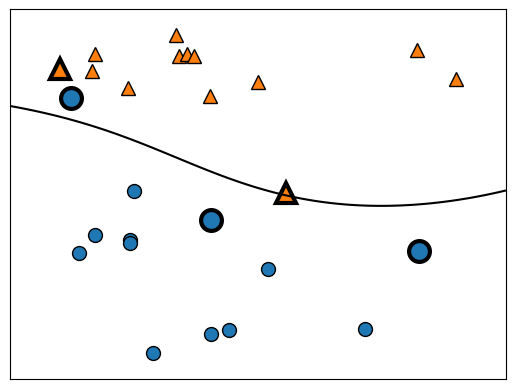

In [364]:
from sklearn.svm import SVC
X,y=mglearn.tools.make_handcrafted_dataset()
svm=SVC(kernel="rbf",C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

sv=svm.support_vectors_
sv_labels=svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")

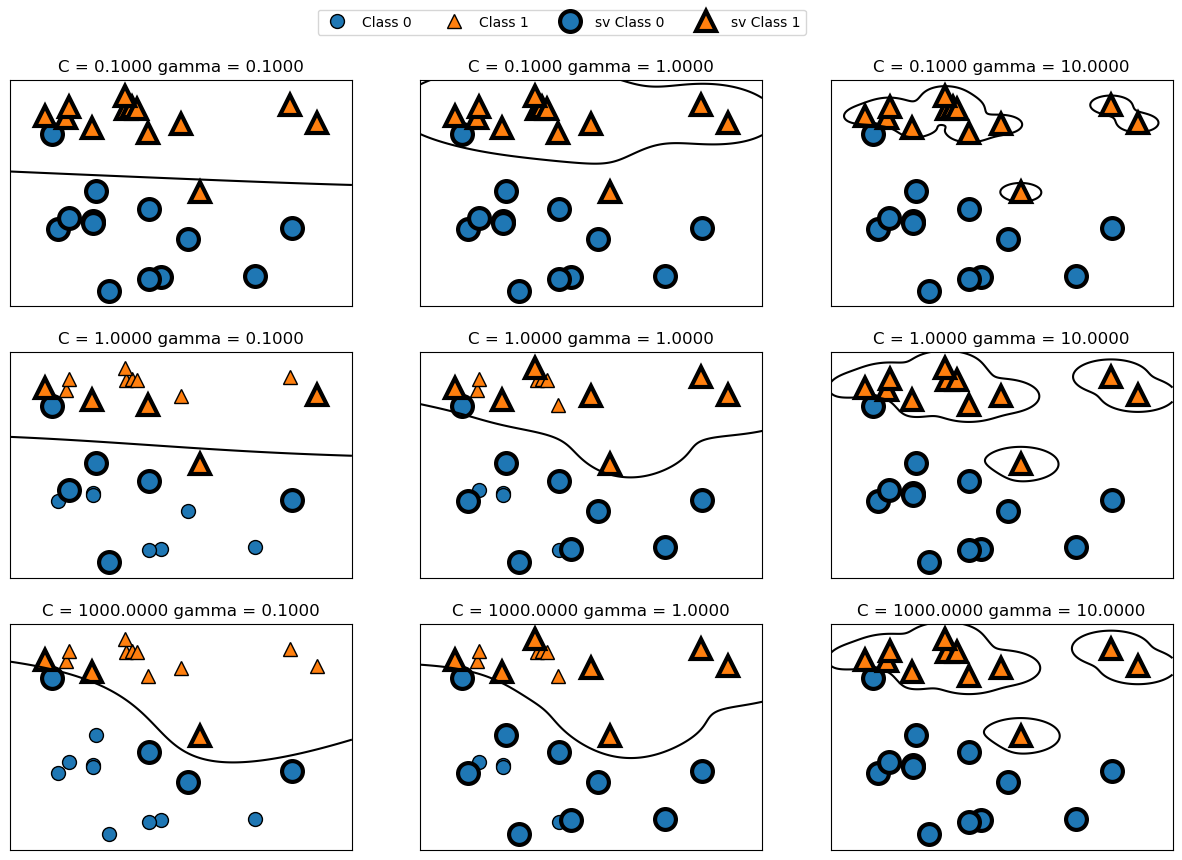

In [372]:
fig,axes=plt.subplots(3,3,figsize=(15,10))

for ax,C in zip(axes,[-1,0,3]):
    for a,gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)

axes[0,0].legend(["Class 0","Class 1","sv Class 0","sv Class 1"],ncol=4,loc=(.9,1.2))

In [384]:
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,cancer.target,random_state=0
)

svc=SVC()
svc.fit(X_train,y_train)

print("train score: {:.2f}".format(svc.score(X_train,y_train)))
print("train score: {:.2f}".format(svc.score(X_test,y_test)))

train score: 0.90
train score: 0.94


Text(0, 0.5, 'Feature magnitude')

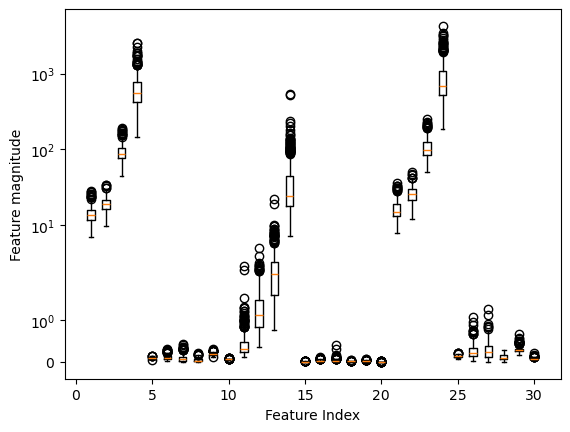

In [388]:
plt.boxplot(X_train,manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature Index")
plt.ylabel("Feature magnitude")

In [390]:
min_on_training=X_train.min(axis=0)
range_on_training=X_train.max(axis=0)-X_train.min(axis=0)

X_train_scaled=(X_train-min_on_training)/range_on_training
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [392]:
X_test_scaled=(X_test-min_on_training)/range_on_training

svc=SVC()
svc.fit(X_train_scaled,y_train)
print(svc.score(X_train_scaled,y_train))
print(svc.score(X_test_scaled,y_test))


0.9835680751173709
0.972027972027972


In [393]:
svc=SVC(C=100)
svc.fit(X_train_scaled,y_train)
print(svc.score(X_train_scaled,y_train))
print(svc.score(X_test_scaled,y_test))


1.0
0.965034965034965
